In [ ]:
# Cell 1: Install dependencies
!pip install -U ultralytics opencv-python matplotlib pyyaml torch torchvision --quiet


In [1]:
# Cell 2: Imports

import os
import yaml
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [2]:
# Cell 3: GPU check

print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
    print("VRAM:", round(torch.cuda.get_device_properties(0).total_memory / 1e9, 2), "GB")
else:
    print("Running on CPU")


CUDA available: True
GPU: NVIDIA GeForce RTX 3050 Laptop GPU
VRAM: 4.29 GB


In [3]:
# Cell 4: Paths (EDIT THESE)

# Dataset root
DATASET_ROOT = "Driver-Monitoring-system-1"

# Model path
PROJECT_NAME = "driver_monitor_sys"
RUN_NAME = "yolo11n_imbalance_fix"
BEST_MODEL_PATH = f"{PROJECT_NAME}/{RUN_NAME}/weights/best.pt"

# Dataset yaml
DATA_YAML = f"{DATASET_ROOT}/data.yaml"

# Test images directory
TEST_IMAGE_DIR = f"{DATASET_ROOT}/test/images"


In [4]:
# Cell 5: Validate paths

paths = {
    "Best model": BEST_MODEL_PATH,
    "Data YAML": DATA_YAML,
    "Test images": TEST_IMAGE_DIR,
}

for name, path in paths.items():
    print(f"{'✅' if os.path.exists(path) else '❌'} {name}: {path}")


✅ Best model: driver_monitor_sys/yolo11n_imbalance_fix/weights/best.pt
✅ Data YAML: Driver-Monitoring-system-1/data.yaml
✅ Test images: Driver-Monitoring-system-1/test/images


In [5]:
# Cell 6: Load class names

with open(DATA_YAML, "r") as f:
    data_cfg = yaml.safe_load(f)

CLASS_NAMES = data_cfg["names"]
NUM_CLASSES = data_cfg["nc"]

print("Classes:")
for i, name in enumerate(CLASS_NAMES):
    print(f"{i}: {name}")


Classes:
0: Distracted
1: Drinking
2: Drowsy
3: Eating
4: PhoneUse
5: SafeDriving
6: Seatbelt
7: Smoking


In [7]:
# Cell 7: Load trained model

model = YOLO(BEST_MODEL_PATH)
print(" Model loaded successfully")


 Model loaded successfully


Testing image: Driver-Monitoring-system-1/test/images\-1070-_mp4-25_jpg.rf.e5cd3925f85ace6f03d4c5aff6a492b7.jpg



image 1/1 c:\Users\jadha\Desktop\Driver-Monitoring-System\Driver-Monitoring-system-1\test\images\-1070-_mp4-25_jpg.rf.e5cd3925f85ace6f03d4c5aff6a492b7.jpg: 384x640 2 SafeDrivings, 1 Seatbelt, 36.5ms
Speed: 4.7ms preprocess, 36.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


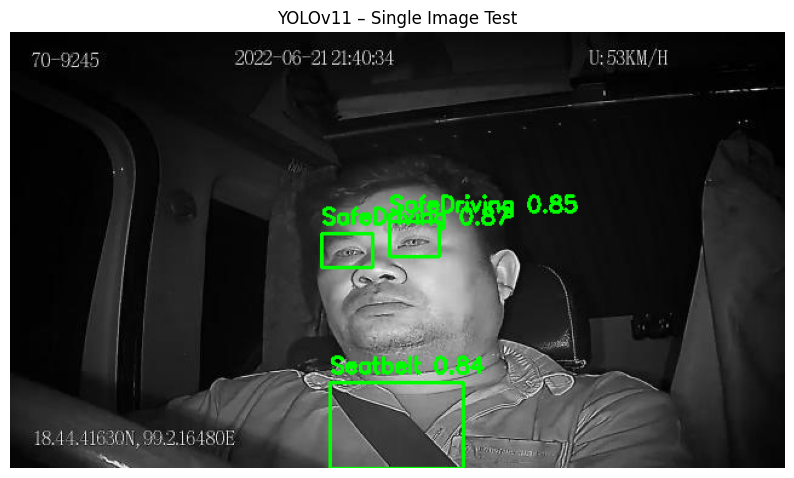

In [9]:
# Cell 8: Single image inference

# Change image name here
IMAGE_NAME = os.listdir(TEST_IMAGE_DIR)[0]
IMAGE_PATH = os.path.join(TEST_IMAGE_DIR, IMAGE_NAME)

print("Testing image:", IMAGE_PATH)

# Run inference
results = model(
    IMAGE_PATH,
    conf=0.20,   # lower = fewer missed detections
    iou=0.65,
    device=0
)

# Load image
img = cv2.imread(IMAGE_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

# Draw detections
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        score = float(box.conf[0])

        label = f"{CLASS_NAMES[cls_id]} {score:.2f}"
        color = (0, 255, 0)

        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(
            img, label, (x1, y1 - 8),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2
        )

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv11 – Single Image Test")
plt.show()



image 1/1 c:\Users\jadha\Desktop\Driver-Monitoring-System\Driver-Monitoring-system-1\test\images\191107134100_0121_cs00_p01_I7e_a00_c00_q000_o00_MMM_xxx_xxx_q000_RGB_png.rf.55bfd3f03162c88d2f7761351811073e.jpg: 384x640 1 Distracted, 36.5ms
Speed: 5.0ms preprocess, 36.5ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 c:\Users\jadha\Desktop\Driver-Monitoring-System\Driver-Monitoring-system-1\test\images\-1076-_mp4-5_jpg.rf.06898aad34232a89265d78c4e41debdb.jpg: 384x640 2 SafeDrivings, 1 Seatbelt, 36.6ms
Speed: 3.4ms preprocess, 36.6ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 c:\Users\jadha\Desktop\Driver-Monitoring-System\Driver-Monitoring-system-1\test\images\96_jpg.rf.15f613a15eafe2e37fe94deb0d6d9006.jpg: 480x640 1 Drowsy, 92.8ms
Speed: 4.2ms preprocess, 92.8ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\jadha\Desktop\Driver-Monitoring-System\Driver-Monitoring-system-1\test\images\

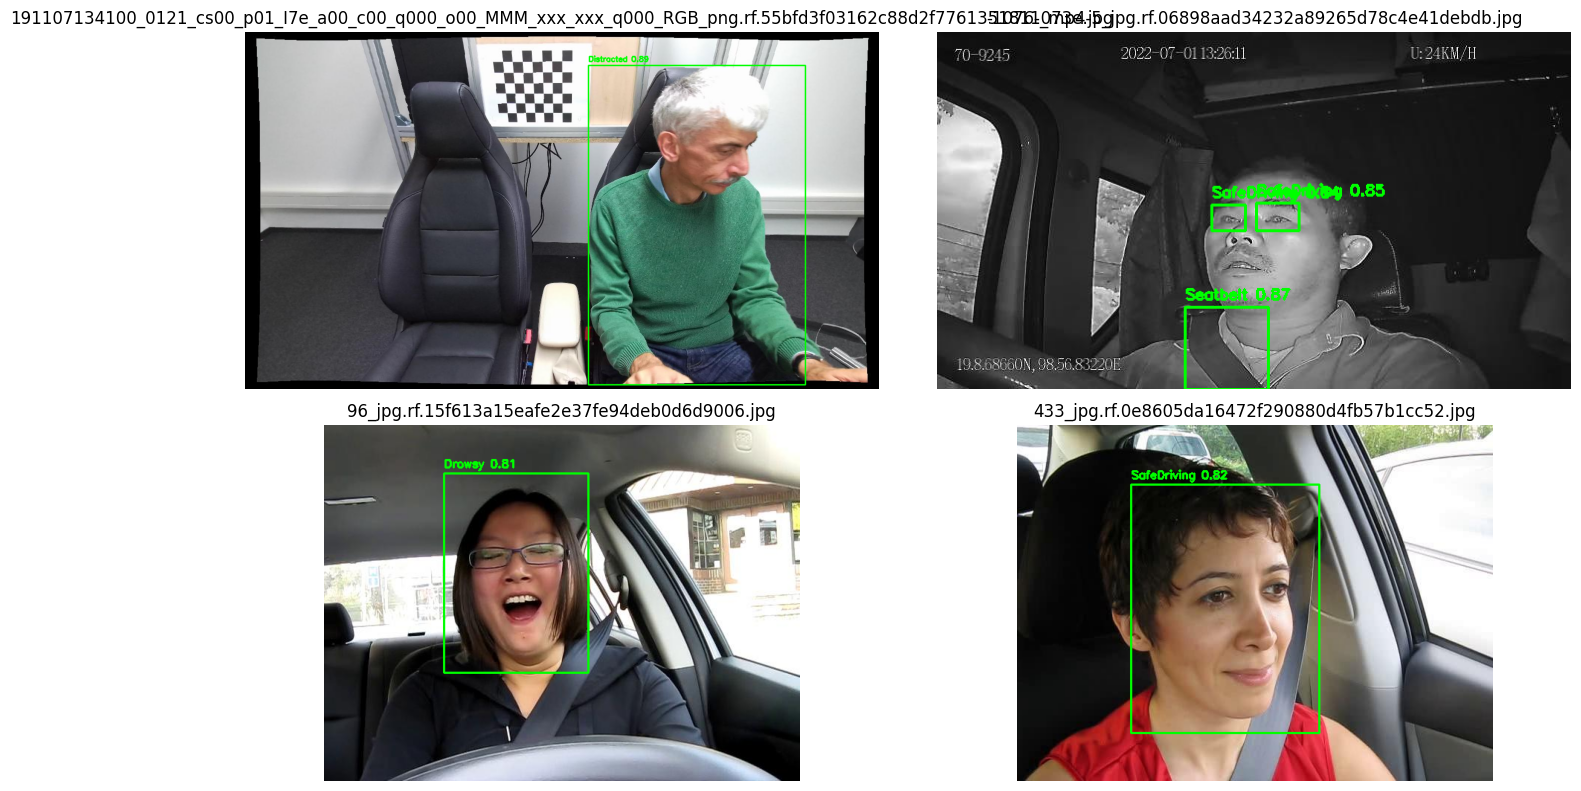

In [10]:
# Cell 9: Random test images

import random

random_images = random.sample(os.listdir(TEST_IMAGE_DIR), 4)

plt.figure(figsize=(14, 8))

for i, img_name in enumerate(random_images):
    img_path = os.path.join(TEST_IMAGE_DIR, img_name)
    results = model(img_path, conf=0.20, iou=0.65)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls_id = int(box.cls[0])
            score = float(box.conf[0])

            cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(
                img,
                f"{CLASS_NAMES[cls_id]} {score:.2f}",
                (x1, y1 - 8),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0,255,0),
                2
            )

    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()



image 1/1 c:\Users\jadha\Desktop\Driver-Monitoring-System\Demo\cigarettes.jpg: 352x640 2 SafeDrivings, 1 Smoking, 69.8ms
Speed: 4.7ms preprocess, 69.8ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


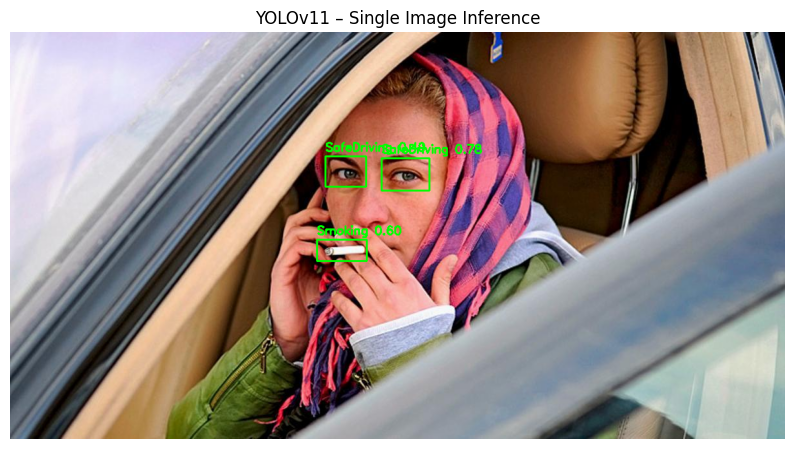

In [15]:
IMAGE_PATH = r"Demo/cigarettes.jpg"
# -------------------------------

# Load class names
import yaml
with open(DATA_YAML, "r") as f:
    CLASS_NAMES = yaml.safe_load(f)["names"]

# Load model
model = YOLO(BEST_MODEL_PATH)

# Run inference
results = model(
    IMAGE_PATH,
    conf=0.20,    # lower = fewer missed detections
    iou=0.65,
    device=0
)

# Load image
img = cv2.imread(IMAGE_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw detections
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        score = float(box.conf[0])

        label = f"{CLASS_NAMES[cls_id]} {score:.2f}"

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(
            img,
            label,
            (x1, y1 - 8),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (0, 255, 0),
            2
        )

# Show output
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv11 – Single Image Inference")
plt.show()